In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()

In [31]:
# import dataset
data = pd.read_csv('cleaned_car_data.csv')
data.head()

,name,manufacturer,year,age,mileage,engine,transmission,price
0,Mazda MX5,Mazda,2007,14,63131,Petrol,Manual,7499
1,Jaguar XF,Jaguar,2010,11,61890,Petrol,Automatic,7775
2,Audi A6,Audi,2012,9,129170,Diesel,Automatic,6950
3,Nissan Qashqai,Nissan,2013,8,44900,Petrol,Automatic,7790
4,MINI Mini,Mini,2017,4,32012,Petrol,Manual,15999


## Data Analysis

In [32]:
#the most expensive cars in the collection
data.nlargest(5, 'price')

,name,manufacturer,year,age,mileage,engine,transmission,price
780,BMW 7 Series,BMW,2017,4,64828,Plug_in_hybrid,Automatic,30000
2931,Ford Transit Custom,Ford,2021,0,891,Diesel,Manual,30000
2935,Ford Transit,Ford,2021,0,176,Diesel,Manual,30000
2984,Ford Transit,Ford,2020,1,12355,Diesel,Manual,30000
2540,Mercedes-Benz GLC,Mercedes-Benz,2017,4,38334,Diesel,Semiautomatic,29999


In [33]:
#cars with the most miles in the collection
data.nlargest(5, 'mileage')

,name,manufacturer,year,age,mileage,engine,transmission,price
1190,Volkswagen CC,Volkswagen,2012,9,184500,Diesel,Manual,3095
1192,Volkswagen CC,Volkswagen,2011,10,176000,Diesel,Automatic,3990
1297,Nissan Navara,Nissan,2006,15,175000,Diesel,Manual,4550
8,Toyota Prius,Toyota,2013,8,172000,Hybrid,Automatic,6290
1916,Audi A6,Audi,2010,11,171175,Diesel,Automatic,3490


In [34]:
#oldest cars in the collection
data.nlargest(5, 'age')

,name,manufacturer,year,age,mileage,engine,transmission,price
1896,Volkswagen T6 Camper Van,Volkswagen,1973,48,70000,Petrol,Manual,19995
704,Jaguar Xk8,Jaguar,1997,24,66000,Petrol,Automatic,8985
1965,Land Rover Discovery,Land-Rover,2000,21,107600,Diesel,Automatic,3895
1273,Porsche Cayenne,Porsche,2004,17,83000,Petrol,Automatic,4990
1640,NISSAN 350 Z,Nissan,2004,17,112000,Petrol,Manual,10000


In [35]:
#drop the year column
data = data.drop('year', axis=1)

In [36]:
data.head()

,name,manufacturer,age,mileage,engine,transmission,price
0,Mazda MX5,Mazda,14,63131,Petrol,Manual,7499
1,Jaguar XF,Jaguar,11,61890,Petrol,Automatic,7775
2,Audi A6,Audi,9,129170,Diesel,Automatic,6950
3,Nissan Qashqai,Nissan,8,44900,Petrol,Automatic,7790
4,MINI Mini,Mini,4,32012,Petrol,Manual,15999


In [37]:
corr = data.corr()
corr

,age,mileage,price
age,1.000000,0.721596,-0.642909
mileage,0.721596,1.000000,-0.534742
price,-0.642909,-0.534742,1.000000


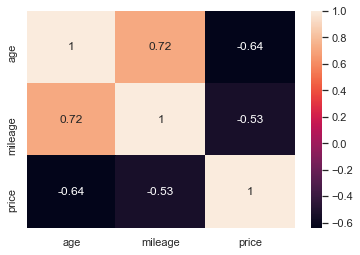

In [38]:
# heat map
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True);

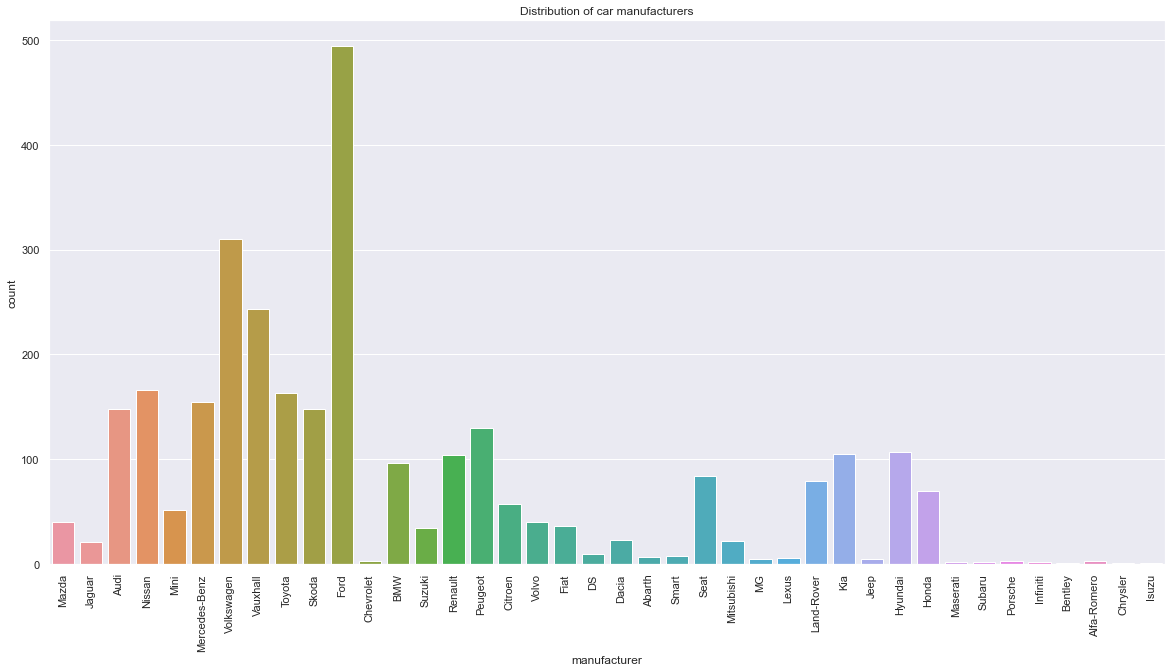

In [39]:
# count of cars by car make
fig = plt.figure(figsize=(20, 10))
sns.countplot(data.manufacturer);
plt.title("Distribution of car manufacturers")
plt.xticks(rotation=90)
plt.savefig('distribution-of-car-manufacturers.png')

In [40]:
# numbers of cars under the various car manufacturers
data.manufacturer.value_counts()

Ford             494
Volkswagen       310
Vauxhall         243
Nissan           166
Toyota           163
Mercedes-Benz    155
Skoda            148
Audi             148
Peugeot          130
Hyundai          107
Kia              105
Renault          104
BMW               96
Seat              84
Land-Rover        79
Honda             70
Citroen           57
Mini              52
Volvo             40
Mazda             40
Fiat              36
Suzuki            34
Dacia             23
Mitsubishi        22
Jaguar            21
DS                10
Smart              8
Abarth             7
Lexus              6
MG                 5
Jeep               5
Alfa-Romero        3
Chevrolet          3
Porsche            3
Subaru             2
Infiniti           2
Maserati           2
Chrysler           1
Bentley            1
Isuzu              1
Name: manufacturer, dtype: int64

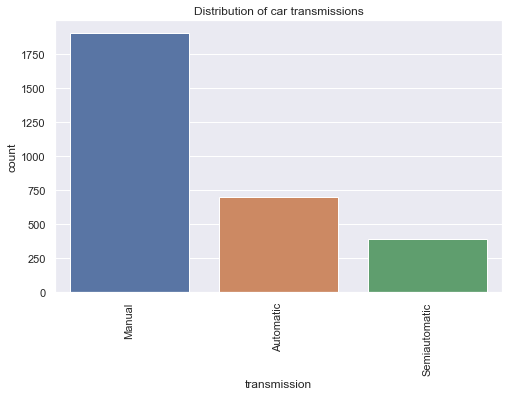

In [41]:
#count of cars by transmission
fig = plt.figure(figsize=(8, 5))
sns.countplot(data.transmission);
plt.title("Distribution of car transmissions")
plt.xticks(rotation=90);
plt.savefig('distribution-of-car-transmission.png')

In [42]:
# number of cars with the various car transmissions 
data.transmission.value_counts()

Manual           1900
Automatic         694
Semiautomatic     392
Name: transmission, dtype: int64

In [43]:
# create a pivot table to find the average price per car make
data.pivot_table(values='price', index='manufacturer', aggfunc='mean')

,price
manufacturer,
Abarth,14109.285714
Alfa-Romero,4513.333333
Audi,15646.513514
BMW,13620.520833
Bentley,21990.000000
Chevrolet,4746.666667
Chrysler,12495.000000
Citroen,9405.947368
DS,10726.800000


<AxesSubplot:xlabel='age', ylabel='price'>

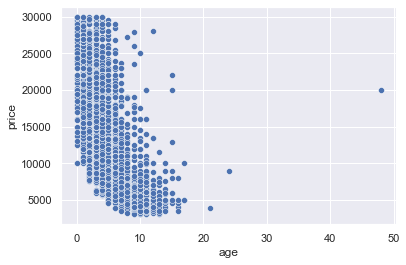

In [44]:
sns.scatterplot(x='age', y='price', data=data)

There is negative correlation between the age and prices of cars. As the age increases, the price reduces

<AxesSubplot:xlabel='mileage', ylabel='price'>

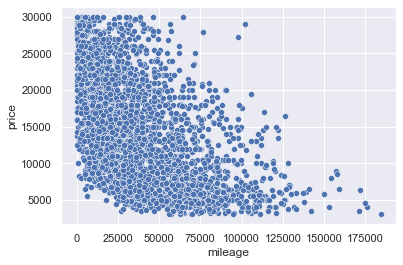

In [45]:
sns.scatterplot(x='mileage', y='price', data=data)

There is negative correlation between the mileage and prices of the cars. As the number of miles travelled increases, the price reduces

<AxesSubplot:xlabel='age', ylabel='mileage'>

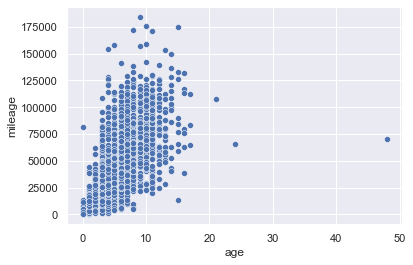

In [46]:
sns.scatterplot(x='age', y='mileage', data=data)

There is negative correlation between the mileage and age of the cars. the number of miles travelled increases with age.

Text(0.5, 1.0, 'Box Plot of Age')

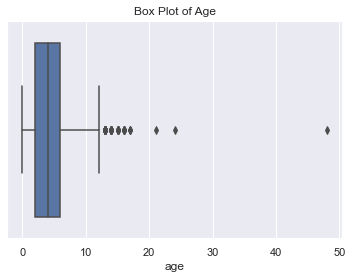

In [47]:
sns.boxplot(x='age', data = data)
plt.title("Box Plot of Age")

There are still outliers in the data but it's fine.

Text(0.5, 1.0, 'Box Plot of Transmission vs Price')

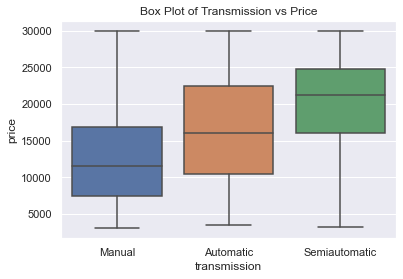

In [48]:
sns.boxplot(x="transmission", y="price", data=data)
plt.title("Box Plot of Transmission vs Price")

In [49]:
from wordcloud import WordCloud, STOPWORDS

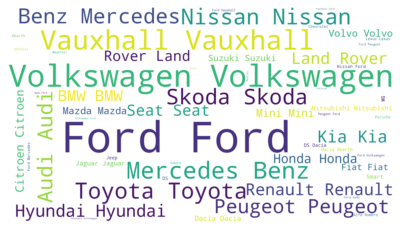

In [50]:
plt.subplots(figsize=(8,4))
wordcloud = WordCloud(background_color='White',width=1920,height=1080).generate(" ".join(data['manufacturer']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cast.png')
plt.show()